In [34]:
# 데이터 전처리
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# 기계학습 모델 생성, 학습, 평가
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.tree import plot_tree # 의사결정 나무 규칙을 시각화하기 위한 패키지

import math

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings(action='ignore')

In [35]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [36]:
# 데이터셋 로드 및 설명 
data = pd.read_csv('cold.csv')
data.head()

,number_treatment,temperature,humidity,rain,wind,sunshine,insolation,pressure,so2,fine_dust,no2,ozone,co,blog,twitter,news,date
0,388743,22.025106,93.278616,68.473728,2.165044,0.131501,3.086855,1009.446949,0.002651,12.263182,0.014465,0.027176,0.440329,1376,4390,38,mon
1,356614,19.579263,89.477751,56.664520,2.274938,0.683480,2.312161,1008.240295,0.002773,15.111833,0.015039,0.030504,0.398744,2140,5754,28,wed
2,272985,23.928169,89.207702,50.940484,2.260809,1.690144,4.656838,998.129844,0.003697,26.270188,0.015470,0.034050,0.389116,746,2854,40,fri
3,401014,23.847571,89.890942,46.451352,1.941459,0.577617,3.206160,1007.132911,0.003285,28.431403,0.015915,0.026960,0.494642,1183,4522,37,mon
4,508750,19.745406,82.521715,44.846233,3.147629,0.021221,2.478511,1010.317957,0.003787,44.558219,0.015271,0.039251,0.430846,1145,5686,44,mon


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number_treatment  624 non-null    int64  
 1   temperature       624 non-null    float64
 2   humidity          624 non-null    float64
 3   rain              624 non-null    float64
 4   wind              624 non-null    float64
 5   sunshine          624 non-null    float64
 6   insolation        624 non-null    float64
 7   pressure          624 non-null    float64
 8   so2               624 non-null    float64
 9   fine_dust         624 non-null    float64
 10  no2               624 non-null    float64
 11  ozone             624 non-null    float64
 12  co                624 non-null    float64
 13  blog              624 non-null    int64  
 14  twitter           624 non-null    int64  
 15  news              624 non-null    int64  
 16  date              624 non-null    object 
dt

In [38]:
print(f'관측치 수 : {data.shape[0]} \n변수 수 : {data.shape[1]}')

관측치 수 : 624 
변수 수 : 17


In [39]:
data.rename(columns = {'number_treatment' : 'treatment'}, inplace = True)


In [40]:
target = ['treatment']
print(target)

category = ['date']
features = list(set(data.columns) - set(target)- set(category))
print(features)

['treatment']
['rain', 'pressure', 'fine_dust', 'sunshine', 'ozone', 'twitter', 'wind', 'blog', 'humidity', 'insolation', 'co', 'so2', 'temperature', 'news', 'no2']


In [41]:
data.describe()

,treatment,temperature,humidity,rain,wind,sunshine,insolation,pressure,so2,fine_dust,no2,ozone,co,blog,twitter,news
count,6.240000e+02,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,3.907555e+05,13.426932,68.655218,4.370007,2.152493,5.818930,7.955404,1015.280162,0.004520,42.980153,0.019626,0.037586,0.568927,1465.418269,7320.049679,38.251603
std,1.890987e+05,10.042270,11.704009,8.168046,0.682390,3.111961,3.544422,8.713932,0.001463,20.110088,0.007320,0.013512,0.208925,698.758707,4335.173388,31.714859
min,3.460200e+04,-9.250773,35.433564,0.000000,0.970962,0.011567,0.623736,967.446712,0.002594,12.263182,0.007120,0.007394,0.276984,479.000000,2351.000000,0.000000
25%,2.679382e+05,3.937282,60.746241,0.241129,1.669080,3.494690,5.207397,1008.862146,0.003490,28.176861,0.014454,0.026942,0.422129,950.000000,3835.500000,20.000000
50%,4.237330e+05,14.299041,69.333283,1.126205,1.968689,6.326333,7.694581,1015.478958,0.004149,38.912996,0.017378,0.035855,0.508383,1309.500000,6396.000000,31.500000
75%,5.097445e+05,22.664586,77.503642,4.091906,2.531489,8.422594,10.487317,1021.428107,0.005091,52.508131,0.023882,0.046657,0.668761,1789.750000,9372.500000,47.000000
max,1.062997e+06,29.844637,93.278616,68.473728,5.326284,12.442753,17.202988,1036.029723,0.010213,149.398846,0.042745,0.090778,1.483788,4914.000000,31187.000000,341.000000


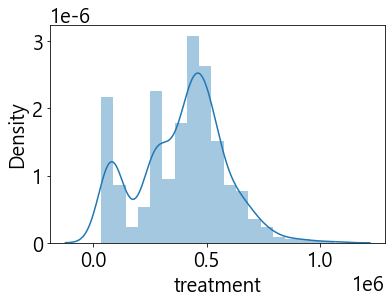

In [42]:
f = sns.distplot(data['treatment'])

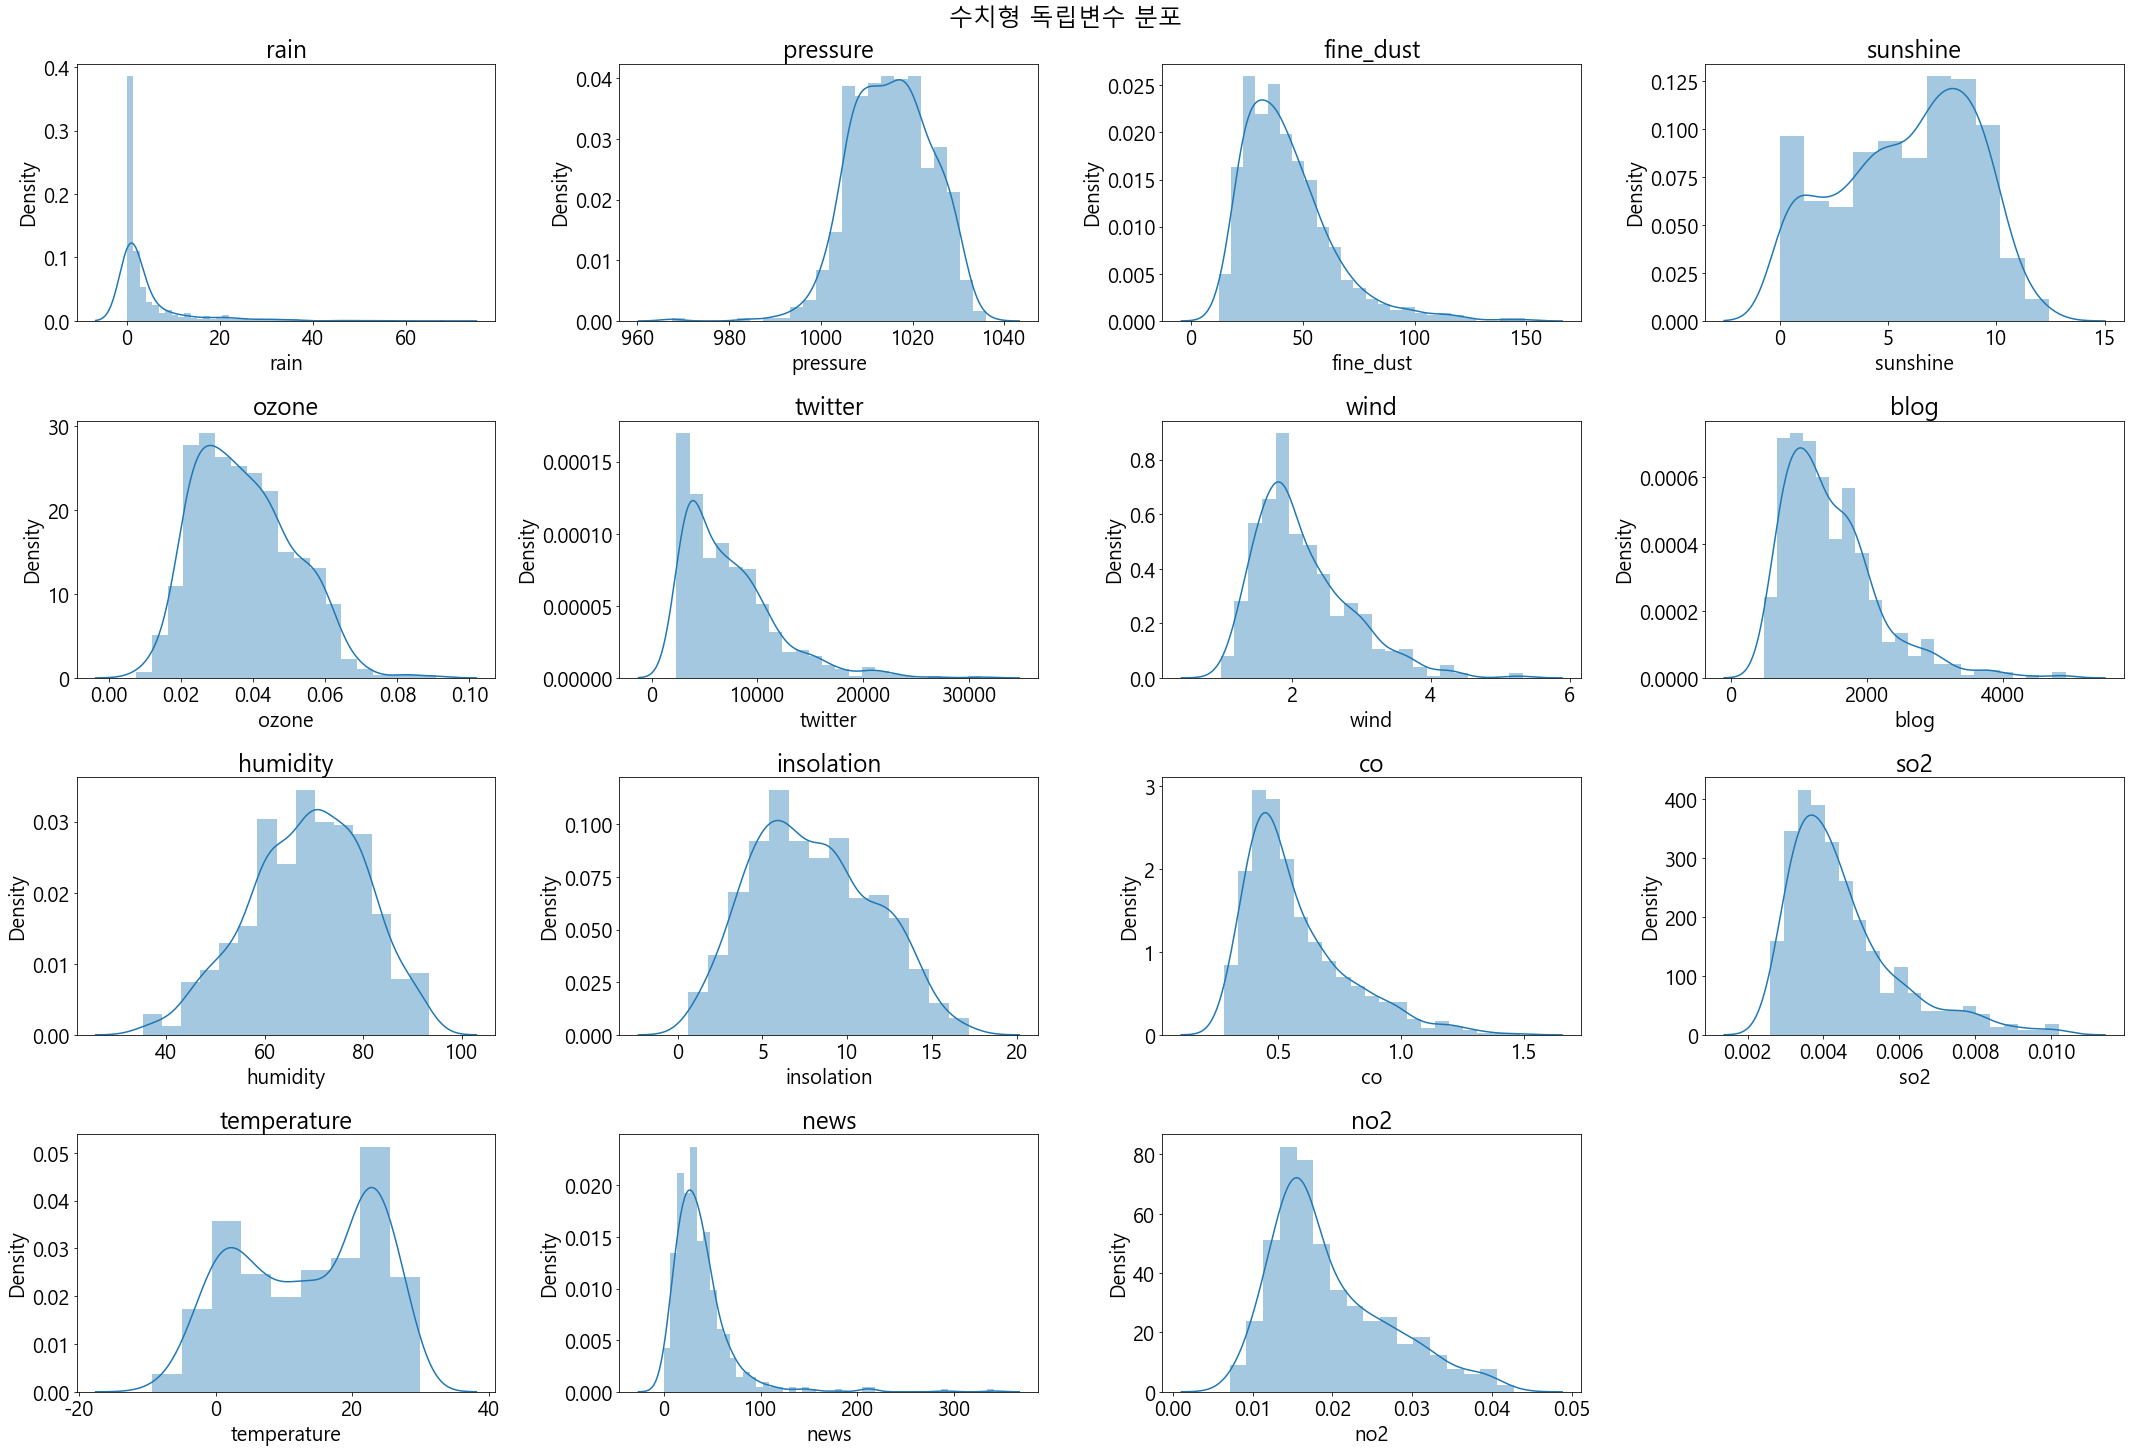

In [43]:
fig = plt.figure(figsize=(30,25))
plt.rc('font', size=20)
fig.suptitle('수치형 독립변수 분포')

for i in range(len(features)):
    ax = fig.add_subplot(5,4,i+1)
    ax = sns.distplot(data[features[i]])
    plt.title(features[i])
fig.tight_layout()
plt.show()

<AxesSubplot:>

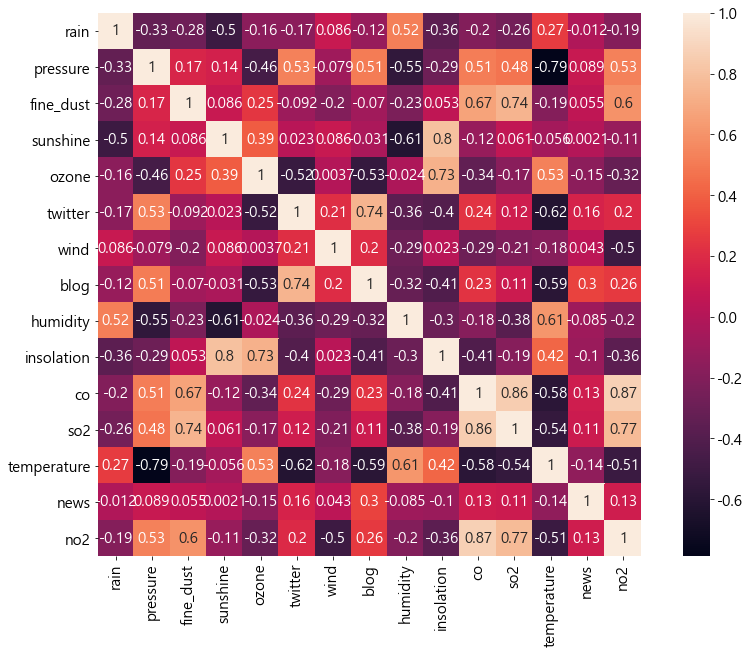

In [44]:
#상관관계분석 피어슨 이용
plt.figure(figsize=(15,10))
plt.rc('font', size=15)
sns.heatmap(data[features].corr(),annot=True,square = True, annot_kws={'size' : 15})


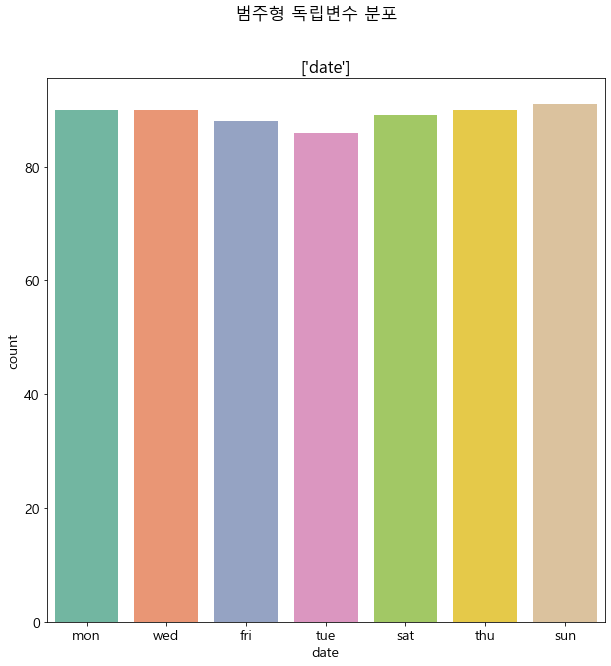

In [45]:
#범주형 종속변수 확인
fig = plt.figure(figsize=(10,10))
plt.rc('font', size=14)
fig.suptitle('범주형 독립변수 분포')
ax = sns.countplot(data['date'],palette='Set2')
plt.title(category)

plt.show()

In [46]:
data = pd.get_dummies(data,drop_first=False)
data

,treatment,temperature,humidity,rain,wind,sunshine,insolation,pressure,so2,fine_dust,...,blog,twitter,news,date_fri,date_mon,date_sat,date_sun,date_thu,date_tue,date_wed
0,388743,22.025106,93.278616,68.473728,2.165044,0.131501,3.086855,1009.446949,0.002651,12.263182,...,1376,4390,38,0,1,0,0,0,0,0
1,356614,19.579263,89.477751,56.664520,2.274938,0.683480,2.312161,1008.240295,0.002773,15.111833,...,2140,5754,28,0,0,0,0,0,0,1
2,272985,23.928169,89.207702,50.940484,2.260809,1.690144,4.656838,998.129844,0.003697,26.270188,...,746,2854,40,1,0,0,0,0,0,0
3,401014,23.847571,89.890942,46.451352,1.941459,0.577617,3.206160,1007.132911,0.003285,28.431403,...,1183,4522,37,0,1,0,0,0,0,0
4,508750,19.745406,82.521715,44.846233,3.147629,0.021221,2.478511,1010.317957,0.003787,44.558219,...,1145,5686,44,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,575410,20.663466,68.100307,0.000000,1.789122,9.985994,11.348284,1018.659071,0.003337,28.330810,...,2066,5565,64,0,1,0,0,0,0,0
620,85072,16.903523,60.443617,0.000000,2.929799,9.847475,9.836912,1017.368901,0.002805,21.095985,...,1719,18687,8,0,0,0,1,0,0,0
621,485405,0.639078,68.133021,0.000000,1.445739,4.145749,4.094858,1026.131353,0.006077,39.798108,...,2474,9011,81,0,0,0,0,0,1,0
622,683612,-1.487549,52.161412,0.000000,1.717698,8.361807,6.525424,1030.300270,0.005262,33.203543,...,2101,10658,32,1,0,0,0,0,0,0


In [47]:
X = data.drop('treatment', axis=1)
y = pd.DataFrame(data['treatment'])
X

,temperature,humidity,rain,wind,sunshine,insolation,pressure,so2,fine_dust,no2,...,blog,twitter,news,date_fri,date_mon,date_sat,date_sun,date_thu,date_tue,date_wed
0,22.025106,93.278616,68.473728,2.165044,0.131501,3.086855,1009.446949,0.002651,12.263182,0.014465,...,1376,4390,38,0,1,0,0,0,0,0
1,19.579263,89.477751,56.664520,2.274938,0.683480,2.312161,1008.240295,0.002773,15.111833,0.015039,...,2140,5754,28,0,0,0,0,0,0,1
2,23.928169,89.207702,50.940484,2.260809,1.690144,4.656838,998.129844,0.003697,26.270188,0.015470,...,746,2854,40,1,0,0,0,0,0,0
3,23.847571,89.890942,46.451352,1.941459,0.577617,3.206160,1007.132911,0.003285,28.431403,0.015915,...,1183,4522,37,0,1,0,0,0,0,0
4,19.745406,82.521715,44.846233,3.147629,0.021221,2.478511,1010.317957,0.003787,44.558219,0.015271,...,1145,5686,44,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,20.663466,68.100307,0.000000,1.789122,9.985994,11.348284,1018.659071,0.003337,28.330810,0.017820,...,2066,5565,64,0,1,0,0,0,0,0
620,16.903523,60.443617,0.000000,2.929799,9.847475,9.836912,1017.368901,0.002805,21.095985,0.009002,...,1719,18687,8,0,0,0,1,0,0,0
621,0.639078,68.133021,0.000000,1.445739,4.145749,4.094858,1026.131353,0.006077,39.798108,0.033591,...,2474,9011,81,0,0,0,0,0,1,0
622,-1.487549,52.161412,0.000000,1.717698,8.361807,6.525424,1030.300270,0.005262,33.203543,0.024179,...,2101,10658,32,1,0,0,0,0,0,0


In [48]:
y

,treatment
0,388743
1,356614
2,272985
3,401014
4,508750
...,...
619,575410
620,85072
621,485405
622,683612


In [49]:
# train / test split 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = .2 , random_state = 42)


In [50]:
# 데이터 컬럼 단위 정규화 하기
# normalizer = StandardScaler()
# X_train = normalizer.fit_transform(X_train)
# X_test = normalizer.transform(X_test)

In [51]:
# # sorting X_test ( for visualization )
# sort_idx = np.argsort(X_test,axis=0).reshape(-1)
# X_test , y_test = X_test[sort_idx] , y_test[sort_idx]

In [52]:
max_depths =[]
for i in range(30):
    max_depths.append(i+1)
max_depths.append(None)

In [53]:
train_r2 = []
test_r2 = []
train_MSE=[]
test_MSE=[]
train_RMSE=[]
test_RMSE=[]
train_MAE=[]
test_MAE=[]
train_MAPE=[]
test_MAPE=[]

for i, max_depth in enumerate(max_depths):
    
    # 모델 학습
    model = DecisionTreeRegressor(max_depth=max_depth) # 나무 최대 깊이를 제한 가능 : 하이퍼파라미터로 조절 가능 None이면 풀트리
    model.fit(X_train, y_train)
    
    # 예측
    # 1. train, test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # 예측 score 기록
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    
    train_MSE.append(mean_squared_error(y_train, y_train_pred))
    test_MSE.append(mean_squared_error(y_test, y_test_pred))
    train_RMSE.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_RMSE.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    train_MAE.append(mean_absolute_error(y_train, y_train_pred))
    test_MAE.append(mean_absolute_error(y_test, y_test_pred))
    train_MAPE.append(mean_absolute_percentage_error(y_train, y_train_pred))
    test_MAPE.append(mean_absolute_percentage_error(y_test, y_test_pred))

In [54]:
train_r2

[0.47322011923169705,
 0.6687084483103668,
 0.7592851845204815,
 0.8235106802680581,
 0.8571895795390673,
 0.8977048543215235,
 0.9290117065978178,
 0.9583240839533028,
 0.9710419520383341,
 0.9793562885968092,
 0.9909527971807489,
 0.9955068198967248,
 0.9977634733977786,
 0.999038744514303,
 0.9996194610514043,
 0.9998533417895541,
 0.9999505366519638,
 0.9999868181290552,
 0.9999969375503993,
 0.9999998285987673,
 0.9999999983369964,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [55]:
test_r2

[0.44544357925004485,
 0.671395605590176,
 0.7924993147865684,
 0.8322605396145589,
 0.8120309338157443,
 0.7893255430129121,
 0.8029865810981449,
 0.7343006169238346,
 0.7801915114869411,
 0.7335908713738761,
 0.7215514353522174,
 0.7123745318868017,
 0.6699205026952988,
 0.6459283460616827,
 0.7211157137791302,
 0.6616201236295691,
 0.7465201055852511,
 0.7147953751724575,
 0.775248049280975,
 0.7099002057157489,
 0.7497577998763669,
 0.7350064580647528,
 0.7247201854734298,
 0.74093580946006,
 0.7385288627982225,
 0.7474327432141414,
 0.7135554501596866,
 0.6729346144870685,
 0.7163493644850174,
 0.7196753035911929,
 0.7299155857851702]

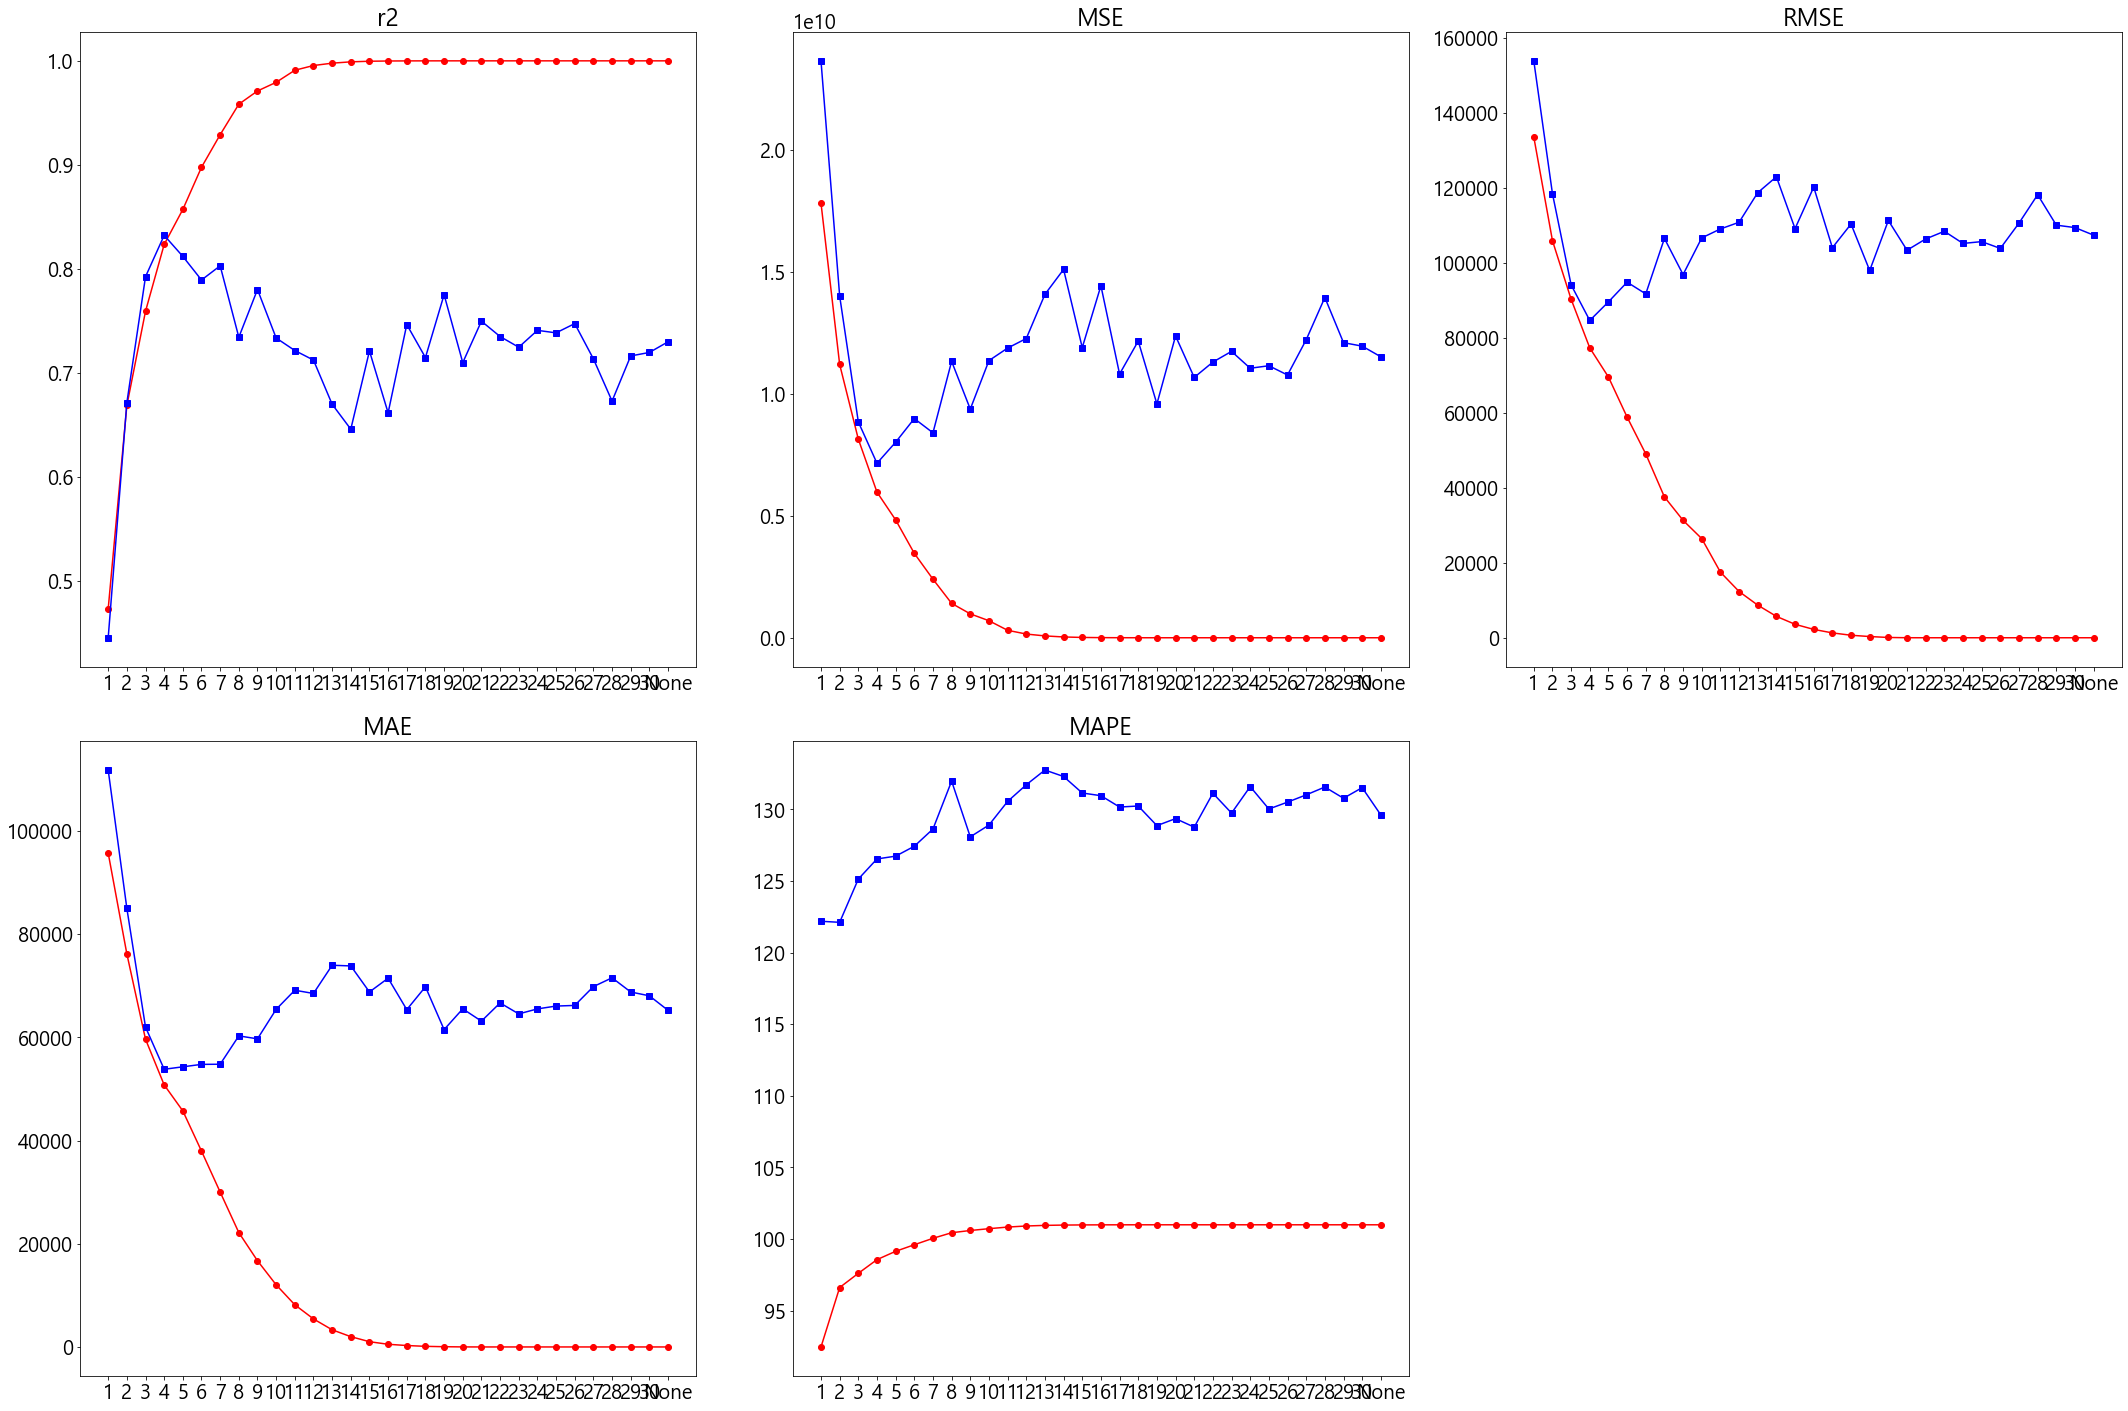

In [56]:
#범주간 불균형이 있는 상황에서 종속변수 Y에 중요변수가 있으므로 F1-measure가 중요지표
performance_measure=['r2', 'MSE','RMSE','MAE','MAPE']
train_list=[train_r2,train_MSE,train_RMSE,train_MAE,train_MAPE]
test_list=[test_r2,test_MSE,test_RMSE,test_MAE,test_MAPE]

fig = plt.figure(figsize=(30,20))
plt.rc('font', size=20)


for i in range(5):
    ax = fig.add_subplot(2,3,i+1)
    xticks = list(map(str, max_depths))
    
    ax.plot(range(len(max_depths)), train_list[i], color='red', marker='o',label='train')
    ax.plot(range(len(max_depths)), test_list[i], color='blue', marker='s',label='test')
#     ax.set_ylabel('train', color='red', fontsize=25)
#     ax2 = ax.twinx()
#     ax2.plot(range(len(max_depths)), test_list[i], color='blue', marker='s')
#     ax2.set_ylabel('test', color='blue', fontsize=25)
    
    plt.xticks(range(len(max_depths)), xticks)
    
    
    plt.title(performance_measure[i])
    
fig.tight_layout()
plt.show()

In [57]:
# 모델 학습
model = DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

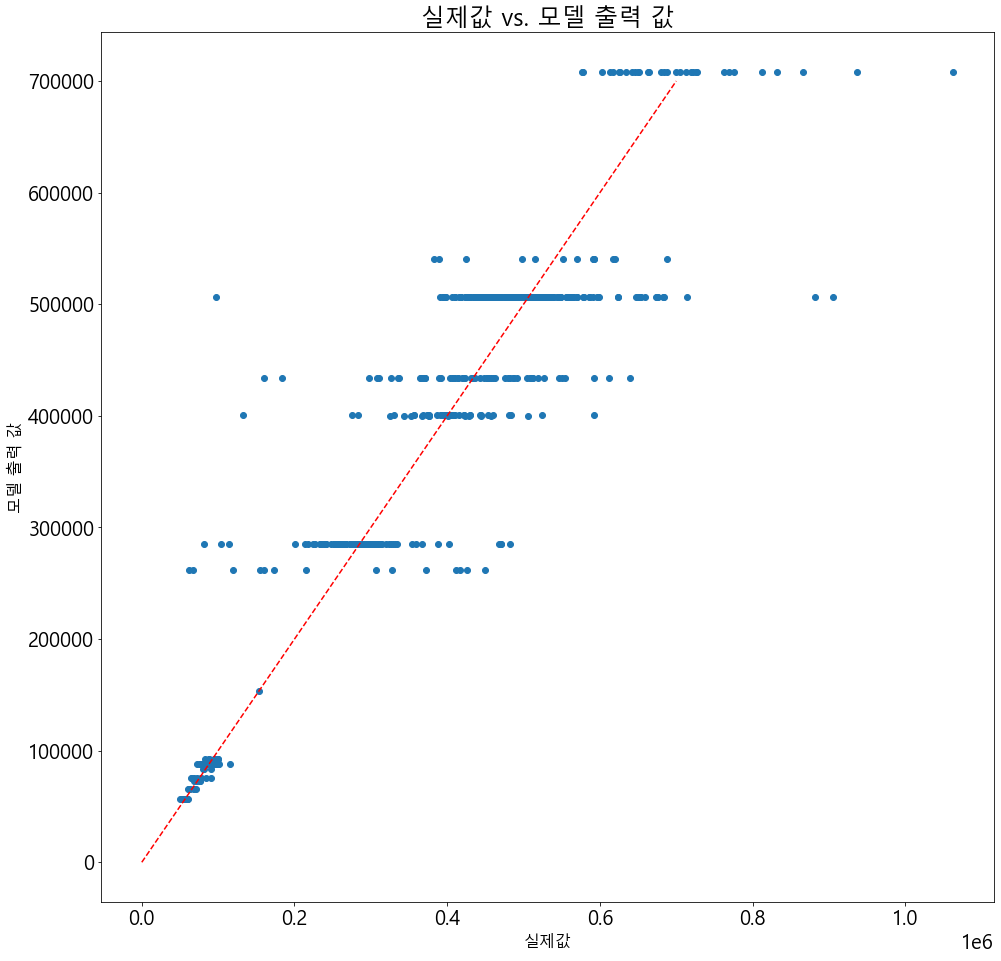

In [58]:
plt.figure(figsize=(16, 16))
plt.title('실제값 vs. 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 700000], [-5, 700000], ls="--", c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
# plt.xlim(-5, 1000)
# plt.ylim(-5, 1000)
plt.show()

In [59]:
print('깊이가 4일때 최적')
print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))
print('---------------------------------------------------------')
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('---------------------------------------------------------')


깊이가 4일때 최적
Training MSE: 5972984328.238
Training RMSE: 77285.085
Training MAE: 50776.045
Training MAPE: 98.563
Training R2: 0.824
---------------------------------------------------------
Testing MSE: 7157174777.734
Testing RMSE: 84600.087
Testing MAE: 53806.843
Testing MAPE: 126.535
Testing R2: 0.832
---------------------------------------------------------


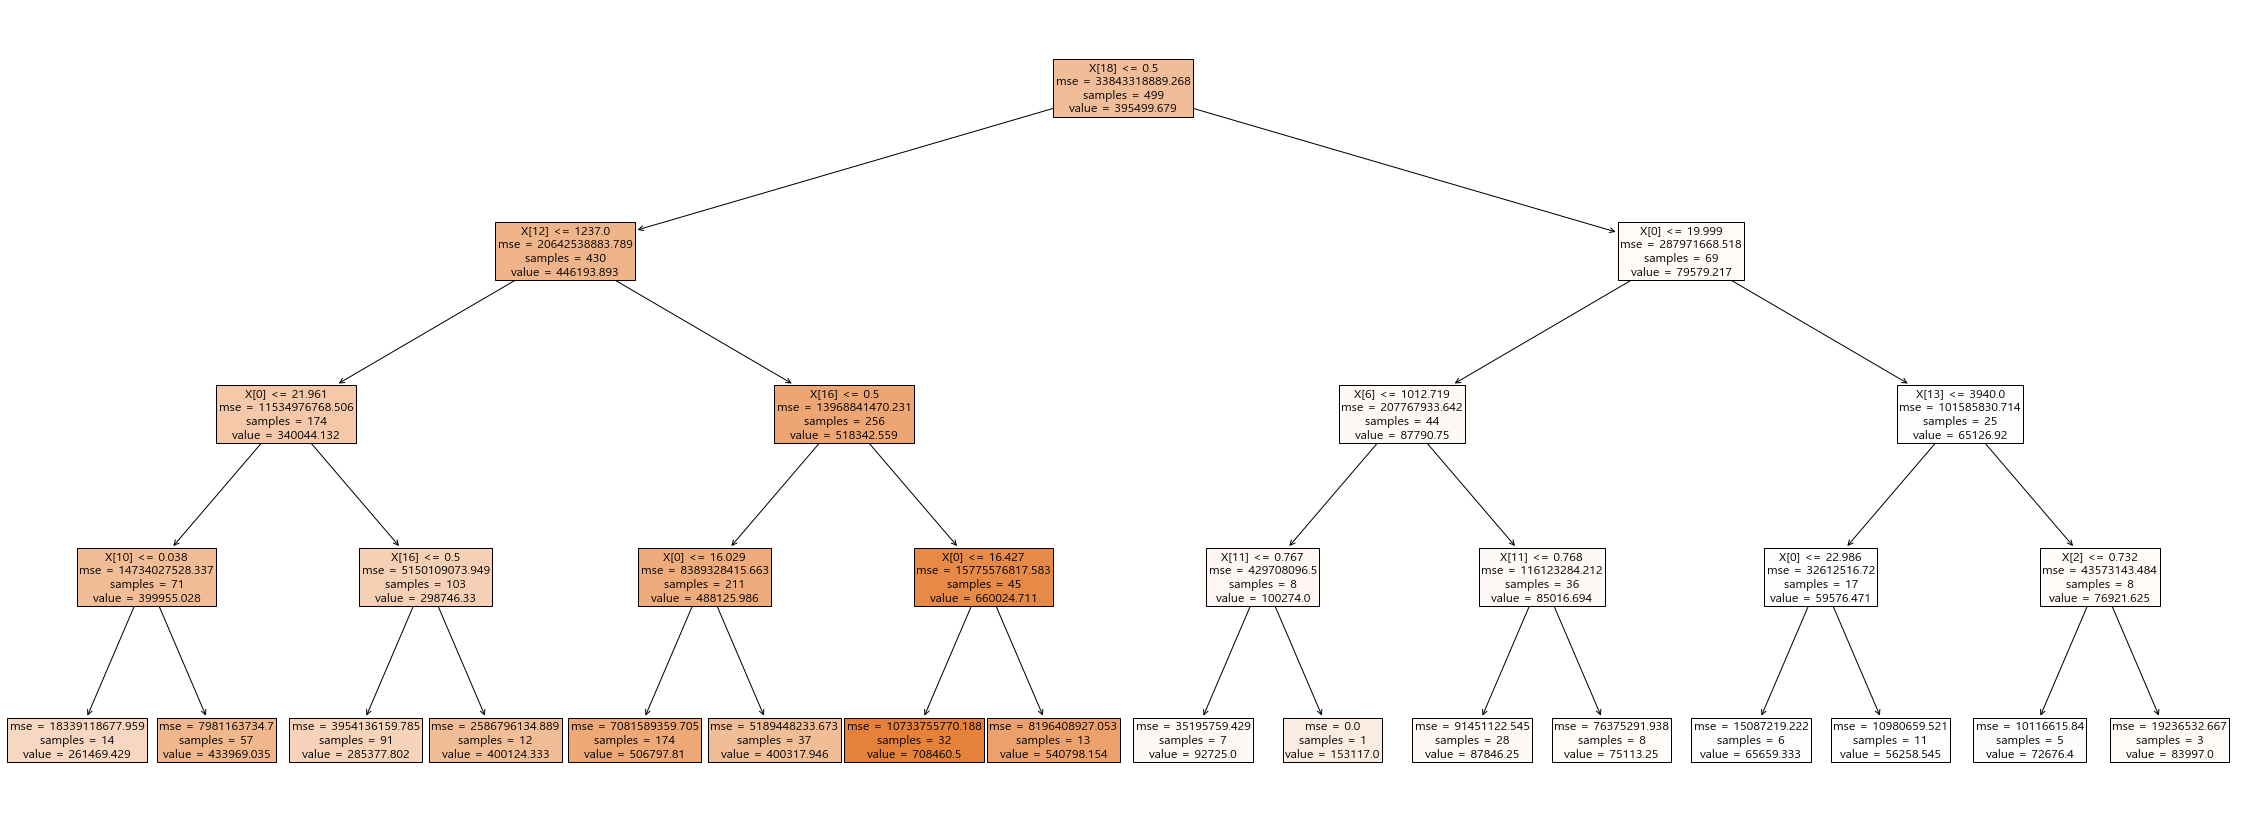

In [71]:
# 학습에 사용되었던 의사결정나무 규칙 시각화
plt.figure(figsize=(40,15))
plot_tree(decision_tree=model , filled=True) # filled : 많은 클래스가 포함되어 있는 것으로 색 표기
plt.show()